# Extracting specific trials

The aim of this section is to extract the trials according to the trigger channel. We will explain how the events can be generated from the stimulus channels and how to extract condition specific trials (epochs). When the trials are extract, the identified artifact will be identified excluding those trials.

### Preparation

Important the relevant Python modules:

In [1]:
import os.path as op
import os
import sys
import numpy as np

import mne
import matplotlib.pyplot as plt

Set the paths for the data and results. Note that these will depend on your local setup.

In [2]:
#data_path = r'C:\Users\JensenO\Dropbox\FLUX\Development\FLUX\data'
# result_path = r'C:\Users\JensenO\Dropbox\FLUX\Development\FLUX\results'
#result_path = r'C:\Users\Ole\Dropbox\FLUX\Development\FLUX\results'
result_path = r'D:\FLUX\results'

file_name = 'training_raw'

### Reading the events from the stimulus channels
First read all the responses and events from the stimulus channel (STI01). We will loop over the 2 raw data fiff-files

In [3]:
for subfile in range(1, 3):
    path_file = os.path.join(result_path,file_name + 'sss_ica-' + str(subfile) + '.fif') 
    raw = mne.io.read_raw_fif(path_file,allow_maxshield=True,verbose=True,preload=True)
    events = mne.find_events(raw, stim_channel='STI101',min_duration=0.001001)
    

    # Save the events in a dedicted FIFF-file: 

    filename_events = op.join(result_path,file_name + 'eve-' + str(subfile) +'.fif')

    mne.write_events(filename_events,events)

    events.shape
    
   

Opening raw data file D:\FLUX\results\training_rawsss_ica-1.fif...
    Range : 208000 ... 1664999 =    208.000 ...  1664.999 secs
Ready.
Reading 0 ... 1456999  =      0.000 ...  1456.999 secs...


<ipython-input-3-ab62b303a164>:3: RuntimeWarning: This filename (D:\FLUX\results\training_rawsss_ica-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_file,allow_maxshield=True,verbose=True,preload=True)


694 events found
Event IDs: [ 1  3  4  5 10 21 22 55 56]


<ipython-input-3-ab62b303a164>:11: RuntimeWarning: This filename (D:\FLUX\results\training_raweve-1.fif) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst or _eve.txt
  mne.write_events(filename_events,events)


Opening raw data file D:\FLUX\results\training_rawsss_ica-2.fif...


<ipython-input-3-ab62b303a164>:3: RuntimeWarning: This filename (D:\FLUX\results\training_rawsss_ica-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_file,allow_maxshield=True,verbose=True,preload=True)


    Range : 1665000 ... 3098999 =   1665.000 ...  3098.999 secs
Ready.
Reading 0 ... 1433999  =      0.000 ...  1433.999 secs...
856 events found
Event IDs: [ 1  3  4  5 10 21 22 55 56]


<ipython-input-3-ab62b303a164>:11: RuntimeWarning: This filename (D:\FLUX\results\training_raweve-2.fif) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst or _eve.txt
  mne.write_events(filename_events,events)


The code above extract the events from the trigger channel STI101. This results are represented in the array events where the first column is the sample and the third column the corresponding trigger value. Note that the events are concatenated across the 2 subfiles.

To visualize a snippet of the events-array write

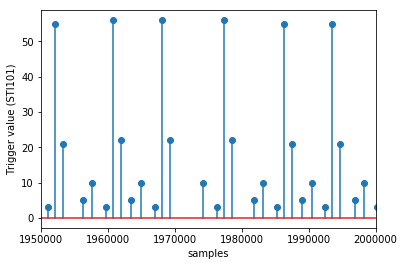

In [4]:
plt.stem(events[:,0],events[:,2])
plt.xlim(1950000,2000000)
plt.xlabel('samples')
plt.ylabel('Trigger value (STI101)')
plt.show()

The figures shows an example for parts of the events arrays. The trigger values indicate specific events of the trials. Here the 'attend left' trials are coded with the trigger 21, whereas the 'attend right' trials with '22'.


### Defining the epochs (trials) according to the event values
Next step is to extract the left and right trials 

In [5]:
events_id = {'left':21,'right':22}

raw_list = list()
events_list = list()


for subfile in range(1, 3):
    # Read in the MaxFiltered raw data from the Result path
    path_file = os.path.join(result_path,file_name + 'sss_ica-' + str(subfile) + '.fif') 
    raw = mne.io.read_raw_fif(path_file, allow_maxshield=True,verbose=True)
    
    filename_events = op.join(result_path,file_name + 'eve-' + str(subfile) +'.fif')
        
    events = mne.read_events(filename_events, verbose=True)
                
    raw_list.append(raw)
    events_list.append(events)


Opening raw data file D:\FLUX\results\training_rawsss_ica-1.fif...


<ipython-input-5-72d40e480318>:10: RuntimeWarning: This filename (D:\FLUX\results\training_rawsss_ica-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_file, allow_maxshield=True,verbose=True)


    Range : 208000 ... 1664999 =    208.000 ...  1664.999 secs
Ready.
Opening raw data file D:\FLUX\results\training_rawsss_ica-2.fif...


<ipython-input-5-72d40e480318>:14: RuntimeWarning: This filename (D:\FLUX\results\training_raweve-1.fif) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(filename_events, verbose=True)
<ipython-input-5-72d40e480318>:10: RuntimeWarning: This filename (D:\FLUX\results\training_rawsss_ica-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_file, allow_maxshield=True,verbose=True)


    Range : 1665000 ... 3098999 =   1665.000 ...  3098.999 secs
Ready.


<ipython-input-5-72d40e480318>:14: RuntimeWarning: This filename (D:\FLUX\results\training_raweve-2.fif) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(filename_events, verbose=True)


Now concatenate raw instances as if they were continuous - i.e combine over the 2 subfiles.

In [6]:
raw, events = mne.concatenate_raws(raw_list,events_list=events_list)
del raw_list 

Set the threshold for rejection of the MEG sensors:

In [7]:
reject = dict(grad=4000e-13,    # T / m (gradiometers)
              mag=4e-12,        # T (magnetometers)
              #eeg=200e-6,       # V (EEG channels)
              #eog=150e-6        # V (EOG channels)
              )


We will use time-windows of interest starting 750 ms prior to the stimulus onset and ending 1500 ms after. Now perform the epoching using the events and events_id as well as the selected channels:

In [8]:
epochs = mne.Epochs(raw,
            events, events_id,
            -2.5 , 2,
            proj=True,
            picks = 'all',
            detrend = 1,
            reject=reject,
            reject_by_annotation=True,
            preload=True,
            verbose=True)

Not setting metadata
Not setting metadata
312 matching events found
Setting baseline interval to [-2.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 312 events and 4501 original time points ...
    Rejecting  epoch based on MAG : ['MEG1221', 'MEG1321', 'MEG1331', 'MEG1431', 'MEG1441', 'MEG2421', 'MEG2431', 'MEG2521', 'MEG2611', 'MEG2621', 'MEG2631', 'MEG2641']
    Rejecting  epoch based on MAG : ['MEG2611']
    Rejecting  epoch based on GRAD : ['MEG1443']
    Rejecting  epoch based on MAG : ['MEG2421', 'MEG2611']
    Rejecting  epoch based on MAG : ['MEG1221', 'MEG1311', 'MEG1321', 'MEG1331', 'MEG1341', 'MEG1441', 'MEG2421', 'MEG2431', 'MEG2521', 'MEG2611', 'MEG2621', 'MEG2641']
    Rejecting  epoch based on MAG : ['MEG1221', 'MEG1311', 'MEG1321', 'MEG1331', 'MEG1341', 'MEG1441', 'MEG2421', 'MEG2521', 'MEG2611', 'MEG2641']
    Rejecting  epoch based on MAG : ['MEG0131', 'MEG0211', 'MEG0241', 'MEG1321', 'MEG1331', 'MEG1341', 'MEG1441',

Plot an overview of rejected epochs:

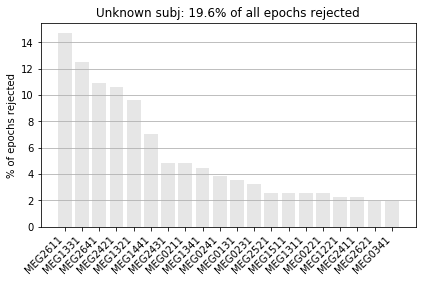

In [9]:
epochs.plot_drop_log();

Note that only a few percent of the trials were rejected due to MEG artifacts in the magnetometers.

Remove epochs exceeding threshold:

In [10]:
epochs.drop_bad()

Save the epoched data in on FIF-file. Note this file from include trials from the 2 subfiles.

In [15]:
path_outfile = os.path.join(result_path,'training_sss_ica_epo.fif') 
epochs.save(path_outfile,overwrite=True)

### Plotting the trials
To show the trials for the left-condition for the MEG gradiometers write:

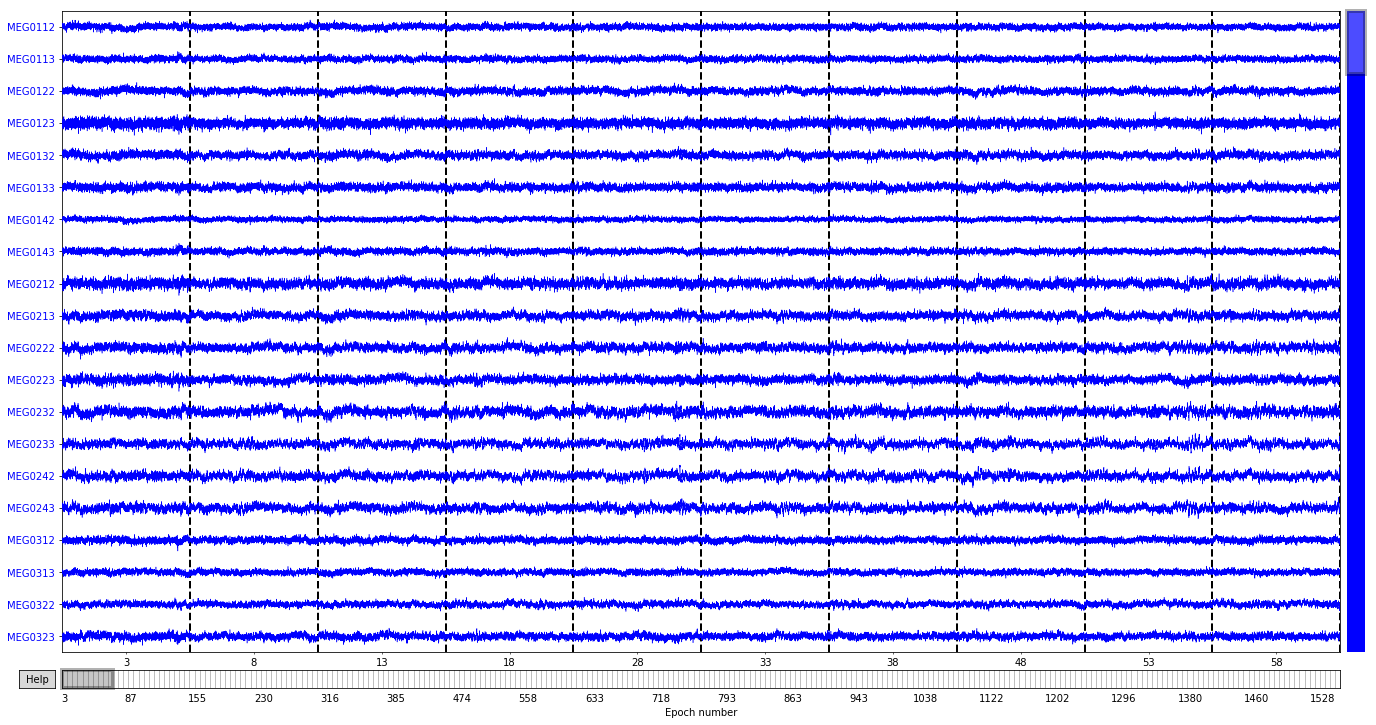

In [16]:
epochs.plot(n_epochs=10,picks=['grad'],event_id={'left':21});

The plot above shows 10 s trials of type left; gradiometers shown.

To show the trigger (stimulus channels) write:

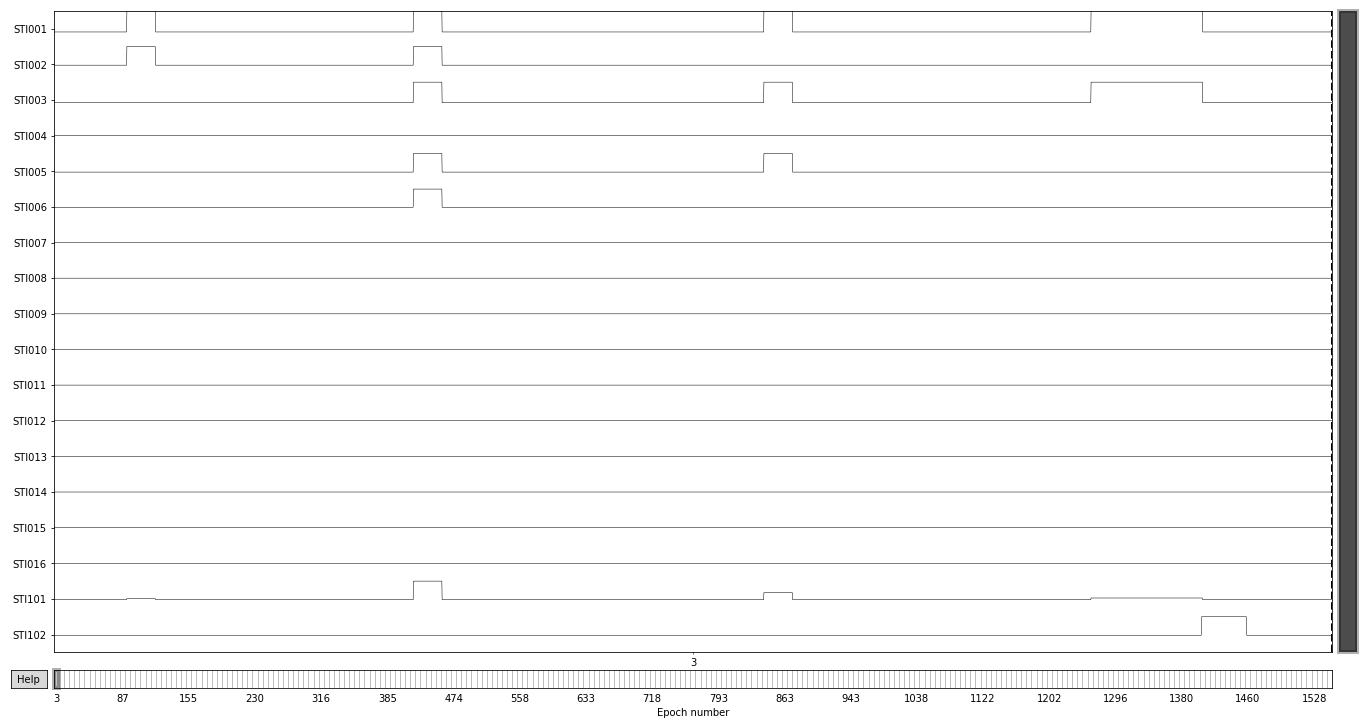

In [17]:
epochs.plot(n_epochs=1,picks=['stim'],event_id={'left': 21});

An example of the trigger channels for one trial.

Showing the trigger channels is often useful for verifying that correct trials have been selected. Note that STI001 to STI016 denote the individual trigger lines which are 'on' (1) or 'off' (0). The channel STI101 is a combination of the trigger lines ( STI101 = STI001 + 2 STI002 + 4 STI003 + 8 STI004 + ...)

To show all the trials belonging to *left* for a representative gradiometer (MEG2343) use the plot_image. In the following example we also lowpass filter the indvidual trials at 30 Hz and shorten them (crop) to a -100 to 400 ms interval:

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Not setting metadata
Not setting metadata
125 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


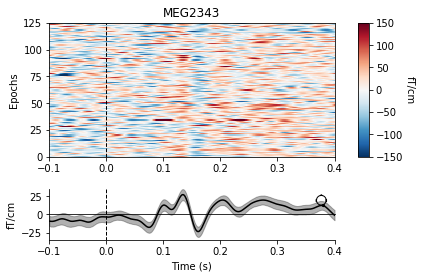

In [14]:
epochs['left'].filter(0.0,30).crop(-0.1,0.4).plot_image(picks=['MEG2343'],vmin=-150,vmax=150);

## Preregistration and publications

Publication, example:

"The data were segmented into intervals of 4.5 s, ranging from 2.5 s prior to stimulus onset and 2 s after. Trials in which the gradiometers exceeded 4000 fT/cm or magnetometers exceeded 4000 fT were rejected" 
